## An Introduction to Neural networks

Neural networks (NNs) and particularly a subset of neural networks (deep neural networks; DNNs) have become the poster child of modern AI due to its recent booming success in solving a multitude of complex problems, such as beating the world's GO champion, facilitating self-driving cars and much more. Here you will learn the basics of neural networks through interactive code in simple python (it's easier than it sounds!). This notebook introduces neural networks in general.

#### So what is a neural network? 
We can try to answer that by considering the simplest NN possible: the perceptron.

In [47]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [6]:
### make FIGURE of perceptron

Borrowing language from neuroscience, we speak of neurons and synapses (more often referred to as 'weights'). A perceptron has two input neurons and one output neuron. A synapse connects input 1 to the output neuron and a second synapse connects from input 2 to the output.

Just like biological neural networks, the post synaptic neuron (output neuron) takes input from incoming synapses, and integrates them (adding together the parts). If this sum reaches a given threshold, the neuron fires, otherwise it does nothing. We represent this output as 1 (fires) or 0 (doesn't fire).

Thus we can use the outcome (0 or 1) as to perform a classification task.

To get the point across, let's make a naive implementation in Python!

In [103]:
def activation(x, threshold):
    if x >= threshold: return 1
    else: return 0


def perceptron(inputs, weights, b=1):
    """
    inputs  : The values in the input neurons (list)
    weights : The weights connecting n1 and n2 to the output neuron (list)
    b       : The threshold below which the postsynaptic neuron won't fire (number)
    """
    n1, n2 = inputs
    w1, w2 = weights
    s = n1*w1 + n2*w2
    return activation(s, b)

In [104]:
# Are you able to make a perceptron that takes 3 inputs? What about an arbitrary number of inputs?
# A: s = sum([input[i]*weight[i] for i in len(inputs)])

In [105]:
my_inputs = [2,1]
my_weights = [0.5, 0.9]
threshold = 1

perceptron(my_inputs, my_weights, threshold)

1

So what's so special about this network? Well, let's see what it is able to do with the following example. Suppose we have the following dataset from a fishing trip. We obtain a data set of weight and length recorded for cod and haddock.

In [107]:
import pandas as pd
df = pd.DataFrame({"Weight":[1.4, 1.6, 1.6, 2,  1.4,  1.3], 
                   "Length":[.6,  .4,  .7,  .6,  .5,   .35], 
                   "Class" :[0,    1,  0,  1,    0,     1]})
df

,Weight,Length,Class
0,1.4,0.60,0
1,1.6,0.40,1
2,1.6,0.70,0
3,2.0,0.60,1
4,1.4,0.50,0
5,1.3,0.35,1


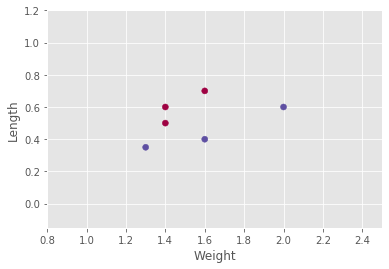

In [108]:
from matplotlib import pyplot as plt

# Define the figure boundaries
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.scatter(x= df.Weight, y = df.Length, c = df.Class, cmap=plt.cm.Spectral)
plt.xlabel("Weight"); plt.ylabel("Length")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()

Is it possible for our perceptron to learn the difference between the cod and the haddock? The function below lets you plot the predicted output of the perceptron over all inputs (you are not expected to understand how the plotting function is implemented).

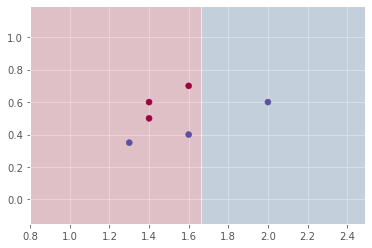

In [196]:
# Modified from https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-download-auto-examples-neighbors-plot-classification-py

X = df.drop(labels=["Class"], axis=1).values

weights = [.6, 0]
b = 1

def plot_decision(clf, weights, b):

    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Make a prediction for every (weight, length) pair
    Z = list(map(lambda p: clf(p, weights, b), np.c_[xx.ravel(), yy.ravel()]))
    Z = np.array(Z).reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=df.Class, cmap=plt.cm.Spectral)
    
plot_decision(perceptron, weights, b)

#### Ex.1 a) Try to change the weights and the threshold b, and see how it affects the decision boundary. b) Change the parameters such that it properly separates the red and the blue dots.

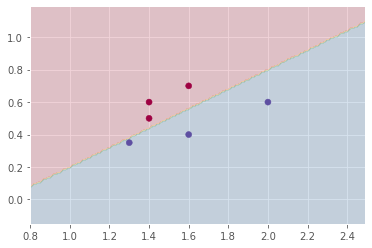

In [296]:
## your code here
## one solution:
weights = [.6, -1]; b = .4

plot_decision(perceptron, weights, b)

The transparent background is the perceptron's prediction over all possible inputs. The line seperating the blue and the 

Now, what if we catch a new fish and we can't decide which species it is? Can the perceptron help us? We measure it to be 2.2 kg and 0.5 m long.

Now, we obviously don't want to manually fiddle with the parameters, but we want the perceptron to learn its own weights by itself. How is this achieved? Well we need to update the weights based on the performance of the perceptron. 

#### error = target value - predicted value = y - pred(X)

So if our prediction is lower then the target, we want our prediction to be higher. A way to achieve this is simply to increase the weights (or decrease the weights if they are negative). This is done in a stepwise fashion, as we loop through each sample. 

In [201]:
# We split the data into the features X and the target y
X = df.drop(["Class"], axis=1).values 
y = df.Class.values

In [202]:
weights

[0.6, -1]

In [346]:
def train(clf, X, y, weights, b, learning_rate=0.1):
    
    w1, w2 = weights
    for i in range(y.shape[0]):
        x_i = X[i,:]
        target = y[i]
        pred = perceptron(x_i, weights)
        error = target - pred
        
        # now we update the weights
        w1 +=  learning_rate * error * weights[0]
        w2 +=  learning_rate * error * weights[1] 
        b +=  learning_rate * error
        
    return w1, w2, b
        

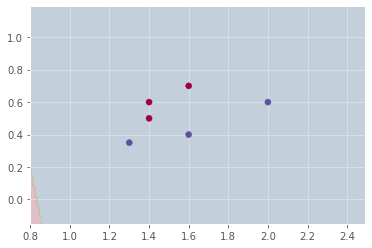

In [354]:
#weights = [0.6, .1]
#b = 1

plot_decision(perceptron, weights, b)

for i in range(10):
    w1, w2, b = train(perceptron, X, y, weights, b, learning_rate=.1)

#plot_decision(perceptron, weights)

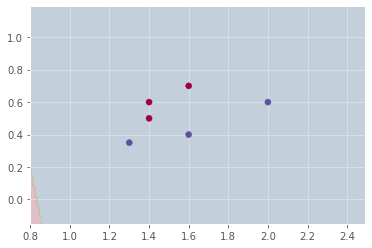

In [355]:
plot_decision(perceptron, [w1,w2], b)

More modern neural networks don't use the all-or-nothing activation function we saw in the perceptron, but rather they choose between a selection of other non-linear activation functions:

In [ ]:
def sigmoid(x):

    return x

def relu(x):
    return max(0, x)

So just by regulating the weights (synapses) of the network, we can make it do some impressive things. However, there is no need to do this by hand: there exist multiple Python libraries which allow you to create, train and test neural networks in the matter of seconds: let's start with `scikit-learn`.